###Implementation text classification using Naïve Bayes, SVM.

#sarcasm detection dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
from sklearn.model_selection import train_test_split


In [3]:
import pandas as pd

df = pd.read_json('/content/drive/MyDrive/NLP 7th sem/dataset/Sarcasm_Headlines_Dataset_v2.json', lines = True)
print(df.shape)

df.head()

(28619, 3)


,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [4]:
df.is_sarcastic.value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

###preprocessing

In [5]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [6]:
df['headline'] = df['headline'].apply(preprocess)

In [35]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientist unveil doomsday cloc...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep totally nail congress fall short gende...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat veggie 9 deliciously different recipe,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevent liar get work,https://local.theonion.com/inclement-weather-p...
4,1,mother come pretty close word stream correctly,https://www.theonion.com/mother-comes-pretty-c...


In [36]:

X_train, X_test, y_train, y_test = train_test_split(
    df.headline,
    df.is_sarcastic,
    test_size=0.2,
    random_state=2022,
    stratify=df.is_sarcastic
)

#Naive Bayes

In [38]:
print(X_train.shape)
X_train.head()

(22895,)


7339     beloved archie comic_strip dark makeover new t...
21234    philly independence mall pope francis offer de...
2117     college rape victim pretty thrilled get recoun...
3678                   care change pharmaceutical industry
25977           hillary clinton take defeat democrats 2008
Name: headline, dtype: object

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer


pipeline = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),
    ('Multi NB', MultinomialNB())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('vectorizer_bow', CountVectorizer(ngram_range=(1, 2))),
                ('Multi NB', MultinomialNB())])

##prediction

In [43]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

print("report\n\n",classification_report(y_test, y_pred))

report

               precision    recall  f1-score   support

           0       0.82      0.81      0.82      2997
           1       0.80      0.81      0.80      2727

    accuracy                           0.81      5724
   macro avg       0.81      0.81      0.81      5724
weighted avg       0.81      0.81      0.81      5724



Text(95.72222222222221, 0.5, 'Actual')

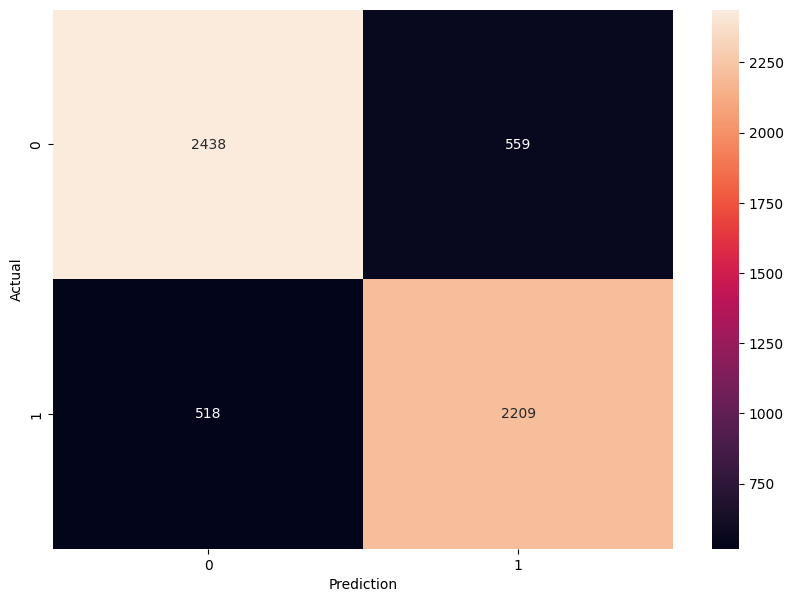

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from matplotlib import pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

#SVM

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipeline2 = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),
    ('svm', SVC())
])

pipeline2.fit(X_train, y_train)


Pipeline(steps=[('vectorizer_bow', CountVectorizer(ngram_range=(1, 2))),
                ('svm', SVC())])

##prediction

In [46]:
from sklearn.metrics import classification_report

sy_pred = pipeline2.predict(X_test)

print("report\n\n",classification_report(y_test, sy_pred))

report

               precision    recall  f1-score   support

           0       0.70      0.94      0.80      2997
           1       0.89      0.55      0.68      2727

    accuracy                           0.75      5724
   macro avg       0.79      0.74      0.74      5724
weighted avg       0.79      0.75      0.74      5724



Text(95.72222222222221, 0.5, 'Actual')

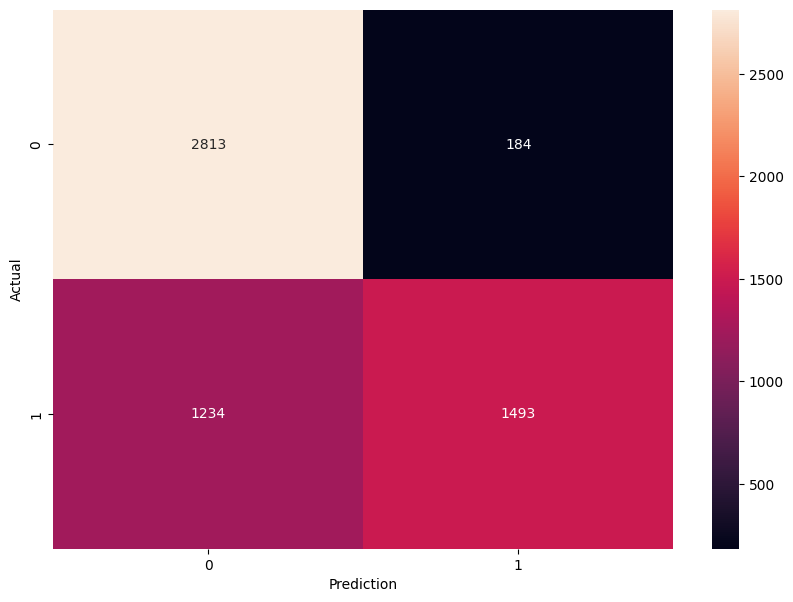

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from matplotlib import pyplot as plt

cm = confusion_matrix(y_test, sy_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')